<div class='bar_title'></div>

*Introduction to Data Science (IDS)*

# Assignment 10 - Predicting Video Game Sales with Deep Learning Solutions

Gunther Gust / Vanessa Haustein <br>
Chair for Enterprise AI<br>
Data Driven Decisions (D3) Group<br>
Center for Artificial Intelligence and Data Science (CAIDAS)

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/d3.png?raw=1" style="width:20%; float:left;" />

In this programming assignment, you need to apply your new deep learning knowledge. In contrast to the last exercises, you don't have to bother about feature engineering. You will build an artificial neural network with multiple layers that learns features from the raw data.

## Introduction and Dataset

You are provided with the already known dataset containing a list of video games with sales greater than 100.000 copies. Again, your task is to build a model predicting the yearly global sales (column ``Global_Sales``) of a video game leveraging the available features.

In [1]:
import pandas as pd

In [2]:
data_path = 'https://raw.githubusercontent.com/vhaus63/ids_data/refs/heads/main/video_game_sales.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8.0,322.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8.0,192.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,NaN,NaN,NaN,NaN,NaN


## Creating Dataloaders

First, import everything we need for the tabular model:

In [3]:
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

To create [TabularDataLoaders](https://docs.fast.ai/tabular.data.html#TabularDataLoaders), you need to assign the variables to dependent, categorical and continuous variables

In [4]:
y_names = 'Global_Sales'
cat_names = ['Platform', 'Genre', 'Rating']
cont_names = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

fast.ai contains classes that define transformations [(see, e.g., this example)](https://docs.fast.ai/tutorial.tabular.html) for preprocessing. Provide a list of appropriate preprocessing steps.

In [5]:
procs = [FillMissing, Categorify, Normalize]

You also need to define the train and test set (using indices!). 
- Use a train/test split of 80/20
- your experiment is supposed to be reproducible

In [6]:
train_idx, test_idx = train_test_split(range(len(df)), test_size=0.2, random_state = 0)

Now you're ready to create the [TabularDataLoaders](https://docs.fast.ai/tabular.data.html#TabularDataLoaders) that you'll use for training.
- Use the method that creates the `dls` from a dataframe
- Set the batch size to 16

In [7]:
dls = TabularDataLoaders.from_df(df=df, y_names=y_names, valid_idx=test_idx, 
                                 procs=procs, cat_names=cat_names, cont_names=cont_names, 
                                 bs=16)

c:\Users\vah55ns\Documents\src\IDS\env\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
c:\Users\vah55ns\Documents\src\IDS\env\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

How many numerical and categorical feautures are created by the dataloaders after preprocessing the data?
- print the names and the count of these features

In [8]:
print('Categorical feature names:', dls.cat_names)
print('Number of categorical features:', len(dls.cat_names))
print('Continuous feature names:', dls.cont_names)
print('Number of continuous features:', len(dls.cont_names))

Categorical feature names: ['Platform', 'Genre', 'Rating', 'Year_of_Release_na', 'Critic_Score_na', 'Critic_Count_na', 'User_Score_na', 'User_Count_na']
Number of categorical features: 8
Continuous feature names: ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
Number of continuous features: 5


## Modeling

### Create Learner

Create an [appropriate learner](https://docs.fast.ai/tabular.learner.html) for the data. A learner creates a neural network for us.
- Use 100 nodes in the first and 50 nodes in the second layer
- Choose the [metrics](https://docs.fast.ai/metrics.html) *root mean squared error* and mean *absolute error*. You can pass a list of metrics to the learner.
- Bonus: Looking at the keyword arguments of the [tabular learner](https://docs.fast.ai/tabular.learner.html), how could you limit the predicted sales appropriately?

In [9]:
# Limiting the output activation fixes instable training and leads to better results
range_buffer = 0.2
y_range = (float(df.iloc[train_idx].Global_Sales.min() * (1-range_buffer)),
           float(df.iloc[train_idx].Global_Sales.max() * (1+range_buffer)))

learn = tabular_learner(dls, layers=[100,50], metrics=[rmse, mae], y_range=y_range)

How many Embeddings are there in the model? Use `learn.dls.show_batch()` to explain why!

In [10]:
learn.summary()

TabularModel (Input shape: 16 x 8)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 11             
Embedding                                 352        True      
____________________________________________________________________________
                     16 x 7              
Embedding                                 91         True      
____________________________________________________________________________
                     16 x 5              
Embedding                                 45         True      
____________________________________________________________________________
                     16 x 3              
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          T

In [11]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(32, 11)
    (1): Embedding(13, 7)
    (2): Embedding(9, 5)
    (3-7): 5 x Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=43, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=100, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
    (3): fastai.layers.SigmoidRange(low=0.008, high=99.036)
  )
)

In [12]:
learn.dls.show_batch()

,Platform,Genre,Rating,Year_of_Release_na,Critic_Score_na,Critic_Count_na,User_Score_na,User_Count_na,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
0,PC,Role-Playing,M,False,False,False,False,False,2011.0,76.0,31.0,6.50,314.999998,0.20
1,N64,Platform,#na#,False,True,True,True,True,1997.0,71.0,21.0,7.13,24.999998,0.43
2,PSP,Sports,#na#,False,True,True,True,True,2011.0,71.0,21.0,7.13,24.999998,0.13
3,PS3,Sports,#na#,False,True,True,True,True,2007.0,71.0,21.0,7.13,24.999998,0.02
4,GC,Misc,T,False,False,False,False,False,2004.0,69.0,30.0,6.00,9.000002,0.39
5,DS,Misc,E,False,True,True,False,True,2009.0,71.0,21.0,7.13,24.999998,0.08
6,XB,Misc,#na#,False,True,True,True,True,2004.0,71.0,21.0,7.13,24.999998,0.02
7,2600,Action,#na#,False,True,True,True,True,1987.0,71.0,21.0,7.13,24.999998,0.65
8,GC,Platform,E,False,False,False,False,False,2003.0,71.0,16.0,8.20,9.000002,0.40
9,PS2,Role-Playing,#na#,False,True,True,True,True,2007.0,71.0,21.0,7.13,24.999998,0.41


Eight Embeddings: three for cat. Platform, Genre, Rating and five additional embedding layers for continuous variables containing na-values

### Find the learning rate 
You need to find a suitable learning rate for the training. Create a meaningful plot for this.

c:\Users\vah55ns\Documents\src\IDS\env\Lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **

SuggestedLRs(valley=0.010964781977236271)


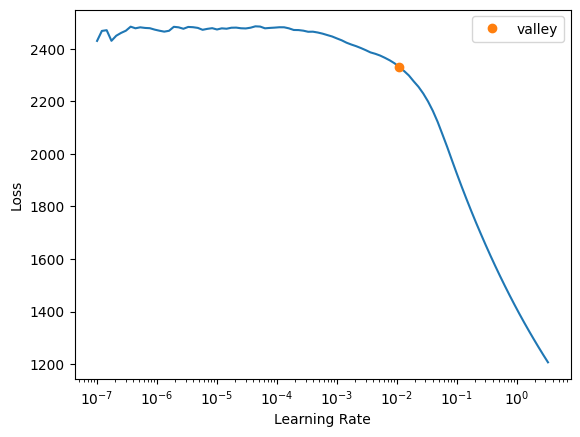

In [13]:
lr_valley = learn.lr_find()
print(lr_valley)

### Fit the model

How many epochs (cycles) are necessary to train the model? Is there a problem with overfitting?

In [14]:
# More than 3 rounds/epochs may increase the chances for overfitting
# Trial and error!
learn.fit_one_cycle(3, lr_max=lr_valley)

epoch,train_loss,valid_loss,_rmse,mae,time
0,2.364137,2.134536,1.461005,0.464919,00:27
1,2.602610,2.179106,1.476180,0.478943,00:28
2,9.080568,1.984705,1.408796,0.490367,00:24


### Evaluate the model

Report the in-sample as well as the out-of-sample performance usinge the mean absolute error.

In [15]:
print("in-sample performance: {}".format(np.array(learn.validate(ds_idx=0)[2])))

in-sample performance: 0.4726029634475708


In [16]:
print("out-of-sample performance: {}".format(np.array(learn.validate(ds_idx=1)[2])))

out-of-sample performance: 0.49036678671836853


## Discussion

Looking at the results, discuss the advantages and disadvantages of deep learning for tabular data.

Some points you could mention:

Advantages
- does not require feature engineering
- thus, it can flexibly adapt to new challenges

Disadvantages
- often requires large amount of data
- requires high compiuting power 
- training ist often time consuming